In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("news.csv")

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
data['label'] = pd.get_dummies(data['label'])

1 - FAKE

0 - REAL

In [5]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [6]:
data =  data.drop("Unnamed: 0",axis=1)

In [7]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [8]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [9]:
data.shape

(6335, 3)

# Data Preprocessing

In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [11]:
ps = PorterStemmer()
corpus_title = []
for i in range(0, len(data)):
    title = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    title = title.lower()
    title = title.split()
    title = [ps.stem(word) for word in title if not word in stopwords.words('english')]
    title = ' '.join(title)
    corpus_title.append(title)

In [12]:
corpus_title[0:30]

['smell hillari fear',
 'watch exact moment paul ryan commit polit suicid trump ralli video',
 'kerri go pari gestur sympathi',
 'berni support twitter erupt anger dnc tri warn',
 'battl new york primari matter',
 'tehran usa',
 'girl horrifi watch boyfriend left facetim',
 'britain schindler die',
 'fact check trump clinton command chief forum',
 'iran reportedli make new push uranium concess nuclear talk',
 'three clinton iowa glimps fire elud hillari clinton campaign',
 'donald trump shockingli weak deleg game somehow got even wors',
 'strong solar storm tech risk today news oct video',
 'way america prepar world war',
 'trump take cruz lightli',
 'women lead differ',
 'shock michel obama hillari caught glamor date rape promot',
 'hillari clinton huge troubl america notic sick thing hidden pictur liberti writer news',
 'iran bill obama like',
 'chart explain everyth need know partisanship america',
 'slipperi slope trump propos ban muslim',
 'episod sunday wire hail deplor special g

In [13]:
data['title']= corpus_title

In [14]:
data['title']

0                                      smell hillari fear
1       watch exact moment paul ryan commit polit suic...
2                           kerri go pari gestur sympathi
3          berni support twitter erupt anger dnc tri warn
4                           battl new york primari matter
                              ...                        
6330       state depart say find email clinton specialist
6331                        p pb stand plutocrat pentagon
6332             anti trump protest tool oligarchi inform
6333    ethiopia obama seek progress peac secur east a...
6334                jeb bush suddenli attack trump matter
Name: title, Length: 6335, dtype: object

In [15]:
ps = PorterStemmer()
corpus_text = []
for i in range(0, len(data)):
    text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus_text.append(text)

In [16]:
data['text']= corpus_text

In [17]:
data['text']

0       daniel greenfield shillman journal fellow free...
1       googl pinterest digg linkedin reddit stumbleup...
2       u secretari state john f kerri said monday sto...
3       kayde king kaydeek novemb lesson tonight dem l...
4       primari day new york front runner hillari clin...
                              ...                        
6330    state depart told republican nation committe c...
6331    p pb stand plutocrat pentagon post oct wikimed...
6332    anti trump protest tool oligarchi reform alway...
6333    addi ababa ethiopia presid obama conven meet l...
6334    jeb bush suddenli attack trump matter jeb bush...
Name: text, Length: 6335, dtype: object

# Data Visualization


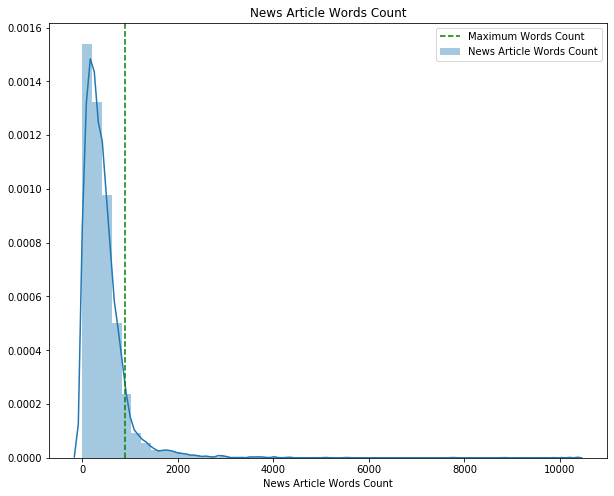

In [18]:
data['news_len'] = data['text'].apply(
    lambda words: len(words.split(" ")))

# Maximum words count in an article, Calculated after averaging & adding standard deviation
max_word_count = np.round(
    data['news_len'].mean() + data['news_len'].std()).astype(int)

plt.figure(figsize=(10, 8))

sns.distplot(data['news_len'], hist=True, kde=True,
             label='News Article Words Count')

plt.axvline(x=max_word_count, color='green',
            linestyle='--', label='Maximum Words Count')
plt.title('News Article Words Count')
plt.xlabel('News Article Words Count')
plt.legend()
plt.show()

trump 22539
said 21212
clinton 18076
state 15946
peopl 11878
presid 10141
year 10036
like 9714
republican 9626
say 9528
time 9500
new 9335
campaign 8698
american 8392
obama 8262
elect 8045
democrat 7807
polit 7385
hillari 7222
support 7141


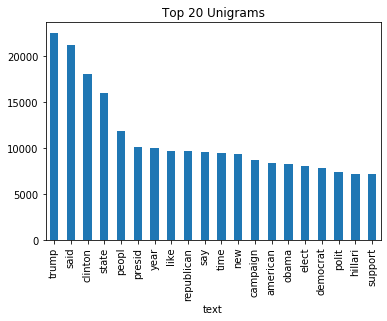

In [19]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(data['text'], 20)
for word, freq in common_words:
    print(word, freq)
data2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
data2.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 Unigrams')


hillari clinton 4361
donald trump 3838
unit state 3052
white hous 2367
new york 2231
presid obama 1267
fox news 1226
secretari state 1206
clinton campaign 1012
new hampshir 1008
foreign polici 986
suprem court 962
barack obama 960
year old 955
islam state 923
trump said 914
berni sander 892
state depart 865
year ago 850
presidenti candid 847


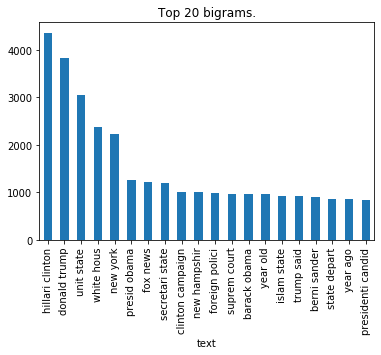

In [20]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(data['text'], 20)
for word, freq in common_words:
    print(word, freq)
data3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
data3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams.')

new york time 615
presid barack obama 410
presid unit state 282
sen ted cruz 278
wall street journal 231
sen marco rubio 218
pic twitter com 216
republican presidenti candid 215
director jame comey 214
new york citi 206
presid georg bush 204
told fox news 200
fbi director jame 198
sen berni sander 196
afford care act 191
privat email server 172
associ press contribut 165
black live matter 165
press contribut report 164
democrat nation committe 164


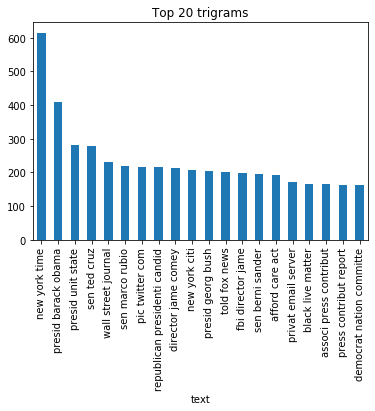

In [21]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(data['text'], 20)
for word, freq in common_words:
    print(word, freq)
data4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
data4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams')

In [22]:
import textblob
from textblob import TextBlob


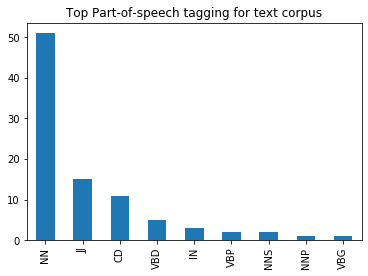

In [23]:
blob = TextBlob(str(data['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='bar',
    title='Top Part-of-speech tagging for text corpus')

#### Feature extraction and Train-Test Split

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
X = tfidf.fit_transform(data.text,data.title)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, data.label, stratify = data.label, random_state=2)

# Analysis over Different Models

### Multinomial Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
mnb = MultinomialNB()


In [28]:
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
pred_mnb = mnb.predict(x_test)
pred_mnb

array([0, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [30]:
ac_mnb = mnb.score(x_test,y_test)
ac_mnb

0.8434343434343434

In [31]:
from sklearn.metrics import plot_confusion_matrix , classification_report


In [32]:
print(classification_report(y_test,pred_mnb))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       793
           1       0.98      0.70      0.82       791

    accuracy                           0.84      1584
   macro avg       0.87      0.84      0.84      1584
weighted avg       0.87      0.84      0.84      1584



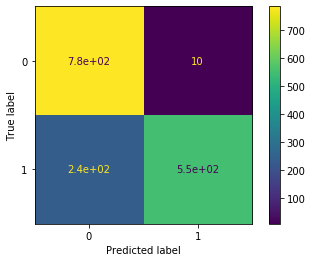

In [33]:
plot_confusion_matrix(mnb, x_test,y_test)

## Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dclf = DecisionTreeClassifier()

In [36]:
dclf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
pred_dclf = dclf.predict(x_test)
pred_dclf

array([1, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [38]:
ac_dclf = dclf.score(x_test,y_test)
ac_dclf

0.797979797979798

In [40]:
print(classification_report(y_test,pred_dclf))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       793
           1       0.79      0.81      0.80       791

    accuracy                           0.80      1584
   macro avg       0.80      0.80      0.80      1584
weighted avg       0.80      0.80      0.80      1584



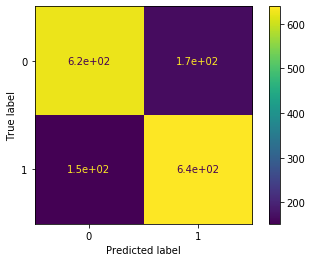

In [41]:
plot_confusion_matrix(dclf,x_test,y_test)

## Linear Support Vector Machines

In [42]:
from sklearn.svm import LinearSVC

In [43]:
lsvc = LinearSVC()

In [44]:
lsvc.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [45]:
pred_lsvc = lsvc.predict(x_test)
pred_lsvc

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [46]:
ac_lsvc = lsvc.score(x_test,y_test)
ac_lsvc

0.9393939393939394

In [47]:
print(classification_report(y_test,pred_lsvc))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       793
           1       0.92      0.96      0.94       791

    accuracy                           0.94      1584
   macro avg       0.94      0.94      0.94      1584
weighted avg       0.94      0.94      0.94      1584



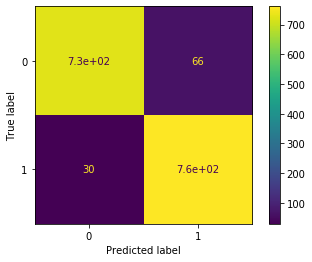

In [48]:
plot_confusion_matrix(lsvc,x_test,y_test)

## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier()

In [51]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
pred_rfc = rfc.predict(x_test)
pred_rfc

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [53]:
ac_rfc = rfc.score(x_test,y_test)
ac_rfc

0.8863636363636364

In [54]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       793
           1       0.88      0.90      0.89       791

    accuracy                           0.89      1584
   macro avg       0.89      0.89      0.89      1584
weighted avg       0.89      0.89      0.89      1584



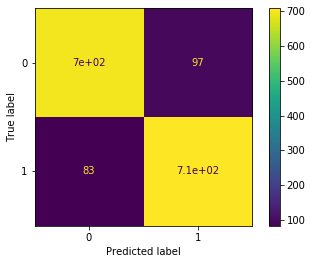

In [55]:
plot_confusion_matrix(rfc,x_test,y_test)

### Comparing Algorithm Accuracy

In [56]:
Dict = {'MultinomialNB':ac_mnb, 'DecisionTreeClf': ac_dclf, 'LinearSVC': ac_lsvc,'RandomForestClf': ac_rfc}

In [57]:
Dict

{'MultinomialNB': 0.8434343434343434,
 'DecisionTreeClf': 0.797979797979798,
 'LinearSVC': 0.9393939393939394,
 'RandomForestClf': 0.8863636363636364}

<Figure size 576x360 with 0 Axes>

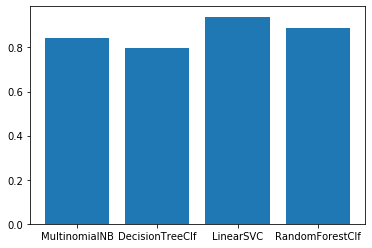

<Figure size 576x360 with 0 Axes>

In [58]:
plt.bar(range(len(Dict)), list(Dict.values()), align='center')
plt.xticks(range(len(Dict)), list(Dict.keys()))
plt.figure(figsize=(8,5))